In [1]:
import pandas as pd

file_path = '/content/drive/MyDrive/notebooks/fakenews.csv'
df = pd.read_csv(file_path)

In [2]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
num_null_text = df['text'].isnull().sum()
print(f"Number of rows with null values in column 'text': {num_null_text}")

Number of rows with null values in column 'text': 39


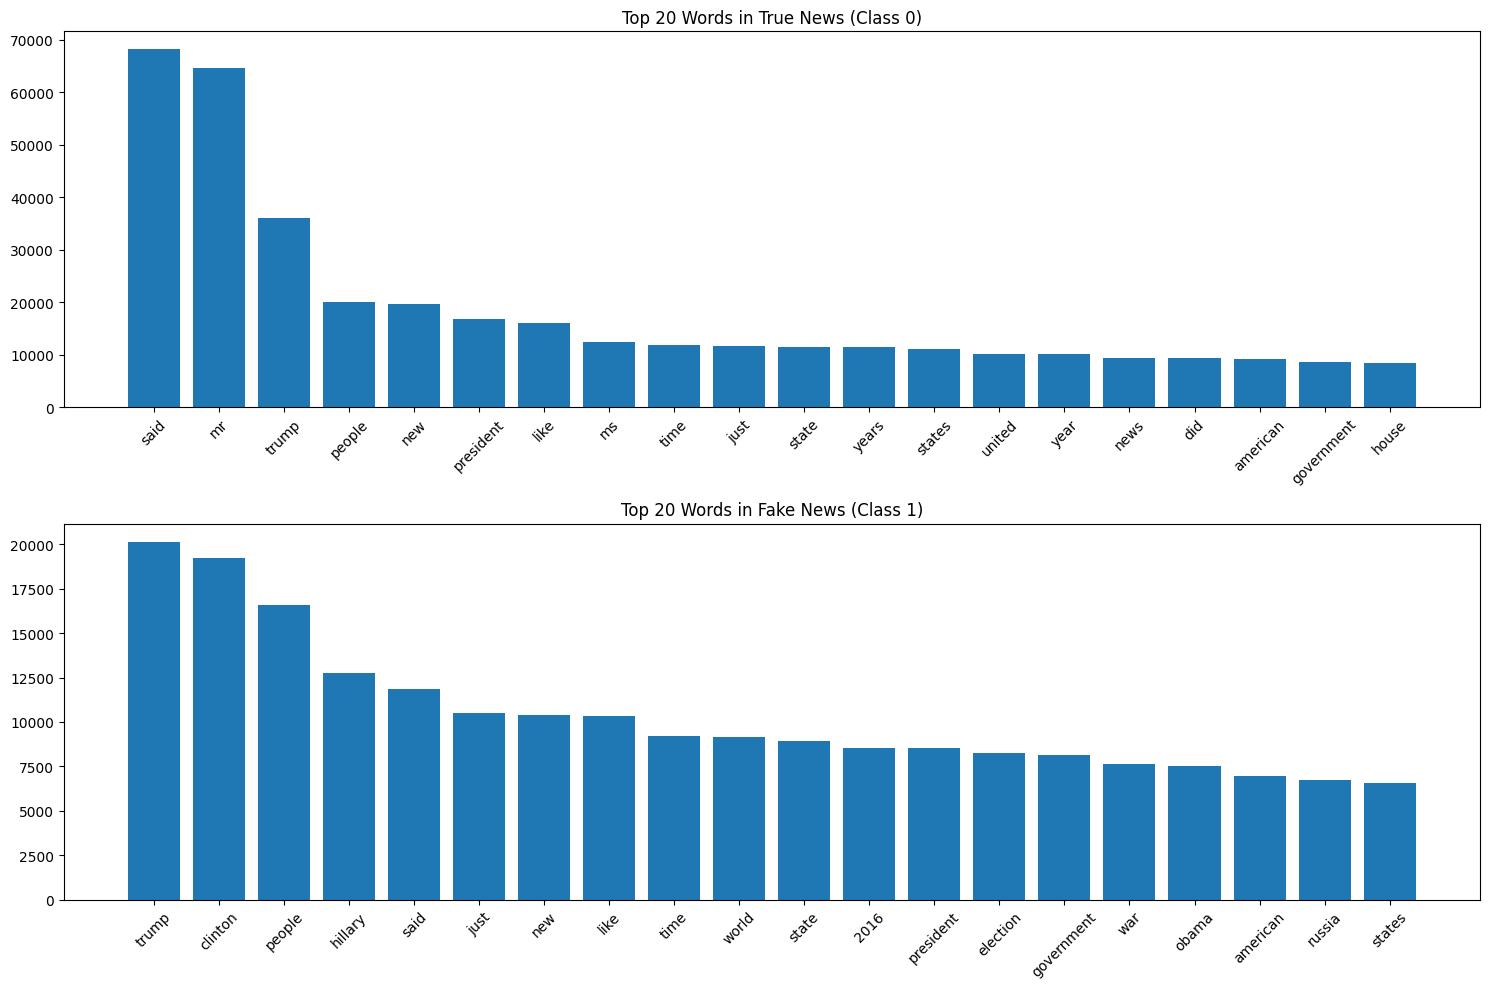

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


df = df.dropna(subset=['text'])


text_0 = df[df['label'] == 0]['text']
text_1 = df[df['label'] == 1]['text']


vectorizer_0 = CountVectorizer(stop_words='english', max_features=5000)
vectorizer_1 = CountVectorizer(stop_words='english', max_features=5000)


text_0_counts = vectorizer_0.fit_transform(text_0)
text_1_counts = vectorizer_1.fit_transform(text_1)

# Sum the word frequencies across all documents (columns) for each class
text_0_word_counts = text_0_counts.sum(axis=0).A1
text_1_word_counts = text_1_counts.sum(axis=0).A1


words_0 = vectorizer_0.get_feature_names_out()
words_1 = vectorizer_1.get_feature_names_out()
text_0_freq = dict(zip(words_0, text_0_word_counts))
text_1_freq = dict(zip(words_1, text_1_word_counts))


text_0_common_words = Counter(text_0_freq).most_common(20)
text_1_common_words = Counter(text_1_freq).most_common(20)


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))


axes[0].bar([word for word, count in text_0_common_words], [count for word, count in text_0_common_words])
axes[0].set_title('Top 20 Words in True News (Class 0)')
axes[0].set_xticks(range(len(text_0_common_words)))
axes[0].set_xticklabels([word for word, count in text_0_common_words], rotation=45)


axes[1].bar([word for word, count in text_1_common_words], [count for word, count in text_1_common_words])
axes[1].set_title('Top 20 Words in Fake News (Class 1)')
axes[1].set_xticks(range(len(text_1_common_words)))
axes[1].set_xticklabels([word for word, count in text_1_common_words], rotation=45)

plt.tight_layout()
plt.show()
